# Pierwsze kroki w obliczeniowej geometrii algebraicznej

Niniejszy rozdział zawiera elementarne wprowadzenie do tematyki geometrii algebraicznej na poziomie obliczeń na rozmaitościach afinicznych. Zbiory algebraiczne będą definiowane za pomocą komendy `subscheme`, która pozwala wykonywać operacje geometryczne na układach równań.

Jednym z kluczowych narzędzi obliczeniowych do efektywnych manipulacji schematami i zbiorami algebraicznymi są bazy Groebnera. Poświęcony im jest osobny plik.

In [3]:
Aff.<x,y>=AffineSpace(Rationals(),2) #przestrzeń afiniczna (wymiaru 2)
S=Aff.subscheme([x^2-y^2])

In [4]:
#S nazywamy schematem

type(S)

<class 'sage.schemes.affine.affine_subscheme.AlgebraicScheme_subscheme_affine_field_with_category'>

In [5]:
S.irreducible_components() #składowe

[
Closed subscheme of Affine Space of dimension 2 over Rational Field defined by:
  x - y,
Closed subscheme of Affine Space of dimension 2 over Rational Field defined by:
  x + y
]

In [6]:
def skl1(m,n):
    return Aff.subscheme([x^n-y^m]).irreducible_components()

In [7]:
skl1(20,20)#rozklad tylko nad pierscieniem bazowym!!!

[
Closed subscheme of Affine Space of dimension 2 over Rational Field defined by:
  x - y,
Closed subscheme of Affine Space of dimension 2 over Rational Field defined by:
  x + y,
Closed subscheme of Affine Space of dimension 2 over Rational Field defined by:
  x^2 + y^2,
Closed subscheme of Affine Space of dimension 2 over Rational Field defined by:
  x^4 - x^3*y + x^2*y^2 - x*y^3 + y^4,
Closed subscheme of Affine Space of dimension 2 over Rational Field defined by:
  x^4 + x^3*y + x^2*y^2 + x*y^3 + y^4,
Closed subscheme of Affine Space of dimension 2 over Rational Field defined by:
  x^8 - x^6*y^2 + x^4*y^4 - x^2*y^6 + y^8
]

In [8]:
def skl2(m,n,k):
    Aff3.<x,y,z>=AffineSpace(Rationals(),3)
    return Aff3.subscheme([x^n-y^m-z^k,x+y-z]).irreducible_components()

In [9]:
skl2(4,4,4)

[
Closed subscheme of Affine Space of dimension 3 over Rational Field defined by:
  z,
  x + y,
Closed subscheme of Affine Space of dimension 3 over Rational Field defined by:
  y,
  x - z,
Closed subscheme of Affine Space of dimension 3 over Rational Field defined by:
  x + y - z,
  2*y^2 - 3*y*z + 2*z^2
]

In [10]:
Aff3.<x,y,z>=AffineSpace(Rationals(),3)

S1=Aff3.subscheme([x^4-y^4-z^4]).irreducible_components()
S1

[
Closed subscheme of Affine Space of dimension 3 over Rational Field defined by:
  x^4 - y^4 - z^4
]

In [11]:
R.<x>=PolynomialRing(Rationals(),1)
f=x^3+x+1
g=x^2+1

f.gcd(g)

1

In [13]:
I=R.ideal(f,g) #ideal zadany przez f i g

I.groebner_basis()

[1]

In [14]:
#przyklad dla dwoch zmiennych
R2.<x,y>=PolynomialRing(Rationals(),2)
eq1=[x^2+y^2-1,x+y+3]
I=R2.ideal(eq1)
I.groebner_basis()

[y^2 + 3*y + 4, x + y + 3]

In [15]:
R2.<x,y>=PolynomialRing(Rationals(),2)
eq1=[x^2+y^2-1,x*y-1]
I=R2.ideal(eq1)
I.groebner_basis()

[y^3 + x - y, x^2 + y^2 - 1, x*y - 1]

In [16]:
Aff=AffineSpace(R2)
S=Aff.subscheme(I) #schemat generowany przez rownania eq1
S

Closed subscheme of Affine Space of dimension 2 over Rational Field defined by:
  x^2 + y^2 - 1,
  x*y - 1

In [17]:
S.irreducible_components()

[
Closed subscheme of Affine Space of dimension 2 over Rational Field defined by:
  x*y - 1,
  x^2 + y^2 - 1,
  y^3 + x - y
]

In [18]:
S.dimension()

0

In [19]:
S.rational_points()

[]

In [20]:
#x==y-y^3
pol=(y-y^3)^2 + y^2 - 1
pol.factor()

(y - 1) * (y + 1) * (y^4 - y^2 + 1)

In [21]:
Z.<T>=PolynomialRing(Rationals())
pol=T^4-T^2+1
K.<s>=NumberField(pol)

S.base_extend(K).irreducible_components()

[
Closed subscheme of Affine Space of dimension 2 over Number Field in s with defining polynomial T^4 - T^2 + 1 defined by:
  y + (-s^3 + s),
  x + s,
Closed subscheme of Affine Space of dimension 2 over Number Field in s with defining polynomial T^4 - T^2 + 1 defined by:
  y + s,
  x + (-s^3 + s),
Closed subscheme of Affine Space of dimension 2 over Number Field in s with defining polynomial T^4 - T^2 + 1 defined by:
  y + (-s),
  x + (s^3 - s),
Closed subscheme of Affine Space of dimension 2 over Number Field in s with defining polynomial T^4 - T^2 + 1 defined by:
  y + (s^3 - s),
  x + (-s)
]

## Przykład generyczny

Obliczenia na zbiorach algebraicznych związane z analizą składowych algebraicznych mogą okazać się niezwykle skomplikowane nawet dla relatywnie prosto zdefiniowanych układów. Poniższy przykład ilustruje skomplikowanie numeryczne obliczeń związanych z analizą składowych oraz użyciem baz Greobnera.

In [22]:
#radosny duzy przyklad

R4.<x,y,w,z>=PolynomialRing(Rationals(),4)
I=R4.ideal([x^4-2*x*z+1,x^5+w^3-12*z^2+1,16*x*(y+1)-z^2+2,w^3*z+x*z+w*y+17])
gro=I.groebner_basis()
for i in range(0,len(gro)):
    print(gro[i])

y^2*w*z^2 + 375596979544937107/686145284797572*y^2*w*z - 763603476971322901/8431353259592564736*x*w^2*z + 9046775383075206289/269803304306962071552*y*w^2*z + 21956670462360815/228715094932524*y^2*z^2 + 13685538440348331073/59956289845991571456*y*w*z^2 - 3096320640411235813/69789121380734189174784*w^2*z^2 - 188293164711702652044317/4782697463043735552*y*z^3 + 42822529964927653511553617/418734728284405135048704*w*z^3 - 62801316177777413348913101/8723640172591773646848*z^4 + 51914150993641620182625217/628102092426607702573056*x^3 + 158814086463305/5489162278380576*y^3 + 889797347803996406538661/26170920517775320940544*x^2*w - 21449979634866120907607801/6542730129443830235136*y^2*w + 51763244116763425/344354217339148959744*x*w^2 + 33730388653158776085025/3877173410040788287488*y*w^2 + 1021984555529049400762325159/1256204184853215405146112*x^2*z + 27832525947028807154131/526959578724535296*y^2*z + 2779306866918083250469141/52341841035550641881088*x*w*z - 228941968057761057809831/36731116516

In [23]:
Aff4=AffineSpace(R4)
S4=Aff4.subscheme(I)
S4

Closed subscheme of Affine Space of dimension 4 over Rational Field defined by:
  x^4 - 2*x*z + 1,
  x^5 + w^3 - 12*z^2 + 1,
  16*x*y - z^2 + 16*x + 2,
  w^3*z + y*w + x*z + 17

In [24]:
S4.dimension() #grobner basis dziala

0

In [25]:
S4.irreducible_components()

[
Closed subscheme of Affine Space of dimension 4 over Rational Field defined by:
  16*x*y - z^2 + 16*x + 2,
  w^3 + 2*x^2*z - 12*z^2 - x + 1,
  192*x*z^3 - 64*x^3 + 32*x^2*z + w*z^2 - 64*z^3 - 16*x*w - 16*x*z + 272*x + 512*y - 2*w + 128*z + 512,
  6*x*w*z^2 + 55296*y*z^3 + 3*w*z^3 + 6720*z^4 - 128*x^3 - 96*x^2*w + 4608*y^2*w - 32*x^2*z - 48*x*w*z + 576*y*w*z + 2256*x*z^2 + 2*w*z^2 + 56320*z^3 + 1632*x^2 - 44*x*w + 4656*y*w + 880*x*z - 3072*y*z - 6*w*z + 544*x + 79360*y - 4*w + 5776*z + 80176,
  2*x^2*z^2 - 12*z^3 - y*w - 2*x*z + z - 17,
  3104*x^2*w*z + w^2*z^2 - 423936*y*z^3 - 111*w*z^3 + 1472*z^4 - 13376*x^3 + 8*x^2*w + 62976*y^2*w - 16*x*w^2 - 2*y*w^2 - 52224*x^2*z + 732*x*w*z + 128*y*w*z + 15984*x*z^2 - 1305216*z^3 + 147456*x^2 + 9437184*y^2 + 272*x*w - 9072*y*w - 2*w^2 - 151376*x*z + 2296832*y*z + 176*w*z + 20043264*y + 478*w + 2380528*z + 9372560,
  20581649364635081197913899008*y^3*z + 1528462284047194050837456346939392*y^2*w*z - 252821699328476050220750277120*x*w^2*z + 1095122

## Algorytm eliminacji

Algorytm eliminacji potrafi wykrywać relacje algebraiczne między wybranymi zestawami zmiennych.

In [26]:
I.elimination_ideal([x,y,z])

Ideal (9663676416*w^38 + 1855425871872*w^37 + 89060475404288*w^36 - 396210536448*w^35 - 34325359755264*w^34 + 385927172063232*w^33 + 3134223548417*w^32 - 170438761119744*w^31 + 596719033081856*w^30 - 2149032383053688*w^29 + 127271681723876352*w^28 - 1234083606331316224*w^27 - 53917704878869268*w^26 + 847892875767558752*w^25 - 4111656669370310656*w^24 - 204349035070209640*w^23 + 1849686562040001088*w^22 - 9507567726248383488*w^21 + 119860604084932057272*w^20 - 1455409515031007410784*w^19 + 6386810181965473879040*w^18 + 595397132805505676608*w^17 - 4707284474449420899904*w^16 + 14594786823548817692672*w^15 + 955987880912928629536*w^14 - 6897607070531001468224*w^13 + 66862529434364995223552*w^12 - 754142483486697075102784*w^11 + 5194859847036942249280192*w^10 - 14714204250698850589194240*w^9 - 1408477212872278058223012*w^8 + 7577101584569933464177152*w^7 - 17387707087878867366764544*w^6 - 584023636955745992048640*w^5 + 8929111643180367700033536*w^4 - 140857887090651262485528576*w^3 + 1261

In [27]:
ElI=I.elimination_ideal([y,z,w])

In [28]:
ElI.gens()[0].factor()

884736*x^38 - 884736*x^37 + 294912*x^36 - 32768*x^35 + 7962624*x^34 - 5308416*x^33 + 3*x^32 + 589823*x^31 + 31752192*x^30 + 17694720*x^29 - 25952232*x^28 + 5799354*x^27 + 74514551*x^26 + 168001560*x^25 - 80215980*x^24 - 17108367*x^23 + 119869770*x^22 + 451015968*x^21 + 268334848*x^20 - 200647316*x^19 + 121454649*x^18 + 616575888*x^17 + 1032045106*x^16 - 123226767*x^15 - 42924404*x^14 + 468954848*x^13 + 1064510136*x^12 + 1322526074*x^11 - 86855943*x^10 + 188498712*x^9 + 354737076*x^8 - 20687233*x^7 + 8292234*x^6 + 30975168*x^5 - 884112*x^4 - 576*x^3 + 884663*x^2 + 3

In [29]:
R.<x,y>=PolynomialRing(Rationals(),2)
I=R.ideal([x^2+y^2-1,x^2-y^2+3])
I.elimination_ideal([x])

Ideal (y^2 - 2) of Multivariate Polynomial Ring in x, y over Rational Field

## Uwikłanie parametryzacji

Dla ustalonych sparametryzowanych zbiorów możemy zastosować oparty na eliminacji ideałowej algorytm, który będzie produkował relacje pomiędzy jawnymi funkcjami zależnymi od parametru.

In [30]:
#uwiklanie parametryzacji

#x==2*t/(t^2+1)
#y==(t^2-1)/(t^2+1)

R.<x,y,t>=PolynomialRing(Rationals(),3)
eq1=[x*(t^2+1)-2*t,y*(t^2+1)-(t^2-1)]
I=R.ideal(eq1)
I

Ideal (x*t^2 + x - 2*t, y*t^2 - t^2 + y + 1) of Multivariate Polynomial Ring in x, y, t over Rational Field

In [31]:
I.groebner_basis()

[x^2 + y^2 - 1, x*t - y - 1, y*t + x - t]

In [32]:
ElI=I.elimination_ideal([t])
ElI

Ideal (x^2 + y^2 - 1) of Multivariate Polynomial Ring in x, y, t over Rational Field

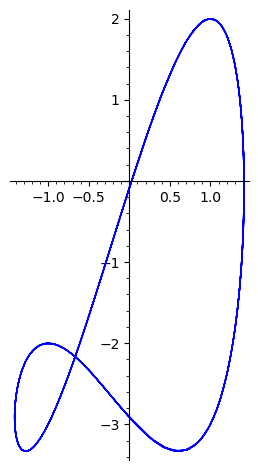

In [33]:
t=var('t')
parametric_plot((cos(t)+sin(t),2*sin(t)-3*cos(t)^2),(t,0,10*pi))

In [34]:
#uwiklanie parametryzacji

R.<x,y,c,s>=PolynomialRing(Rationals(),4)
eq1=[x-(c+s),y-(2*s-3*c^2),c^2+s^2-1]
I=R.ideal(eq1)
ElI=I.elimination_ideal([c,s]) #eliminacja c i s
ElI

Ideal (9*x^4 + 12*x^3 - 10*x^2 - 8*x*y + 4*y^2 - 36*x + 12*y + 1) of Multivariate Polynomial Ring in x, y, c, s over Rational Field

In [35]:
F=9*x^4 + 12*x^3 - 10*x^2 - 8*x*y + 4*y^2 - 36*x + 12*y + 1

In [36]:
F.subs(x=cos(t)+sin(t),y=2*sin(t)-3*cos(t)^2).factor()

(45*cos(t)^2 + 36*cos(t)*sin(t) + 9*sin(t)^2 + 36*cos(t) + 12*sin(t) - 1)*(cos(t)^2 + sin(t)^2 - 1)

## Osobliwości parametryzacji

Mając dane uwikłanie funkcji zadanej parametrycznie można stosunkowo prosto przeprowadzić analizę osobliwości. W tym podejściu nie musimy wyznaczać jawnej formuły na parametr.

In [37]:
#osobliwosci krzywej F(x,y)=0

osobeq=[F.derivative(x),F.derivative(y),F]
I2=R.ideal(osobeq)
I2.groebner_basis()

[x + 2/3, y + 13/6]

Poniższy rachunek ilustruje problem ze znalezieniem parametru dla rozwiązania zadanego układu równań.

In [38]:
t=var('t')
solve([cos(t)+sin(t)==-2/3,2*sin(t)-3*cos(t)^2==-13/6],t)

[]